In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [13]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [14]:
df.shape

(338199, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [16]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [17]:
# dropping Null values
df=df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [19]:
# drop unnecessary features
df=df.drop(['neo_id','name','orbiting_body'],axis=1)

In [20]:
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [21]:
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [22]:
# segreate features and labels 识别特征和标签
X=df.drop('is_hazardous',axis=1)
y=df['is_hazardous']

In [23]:
X.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')

In [24]:
# Explore the dataset : AN EDA overview 探索数据集：AN EDA 概述

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
feature_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
target_column = 'is_hazardous'
 

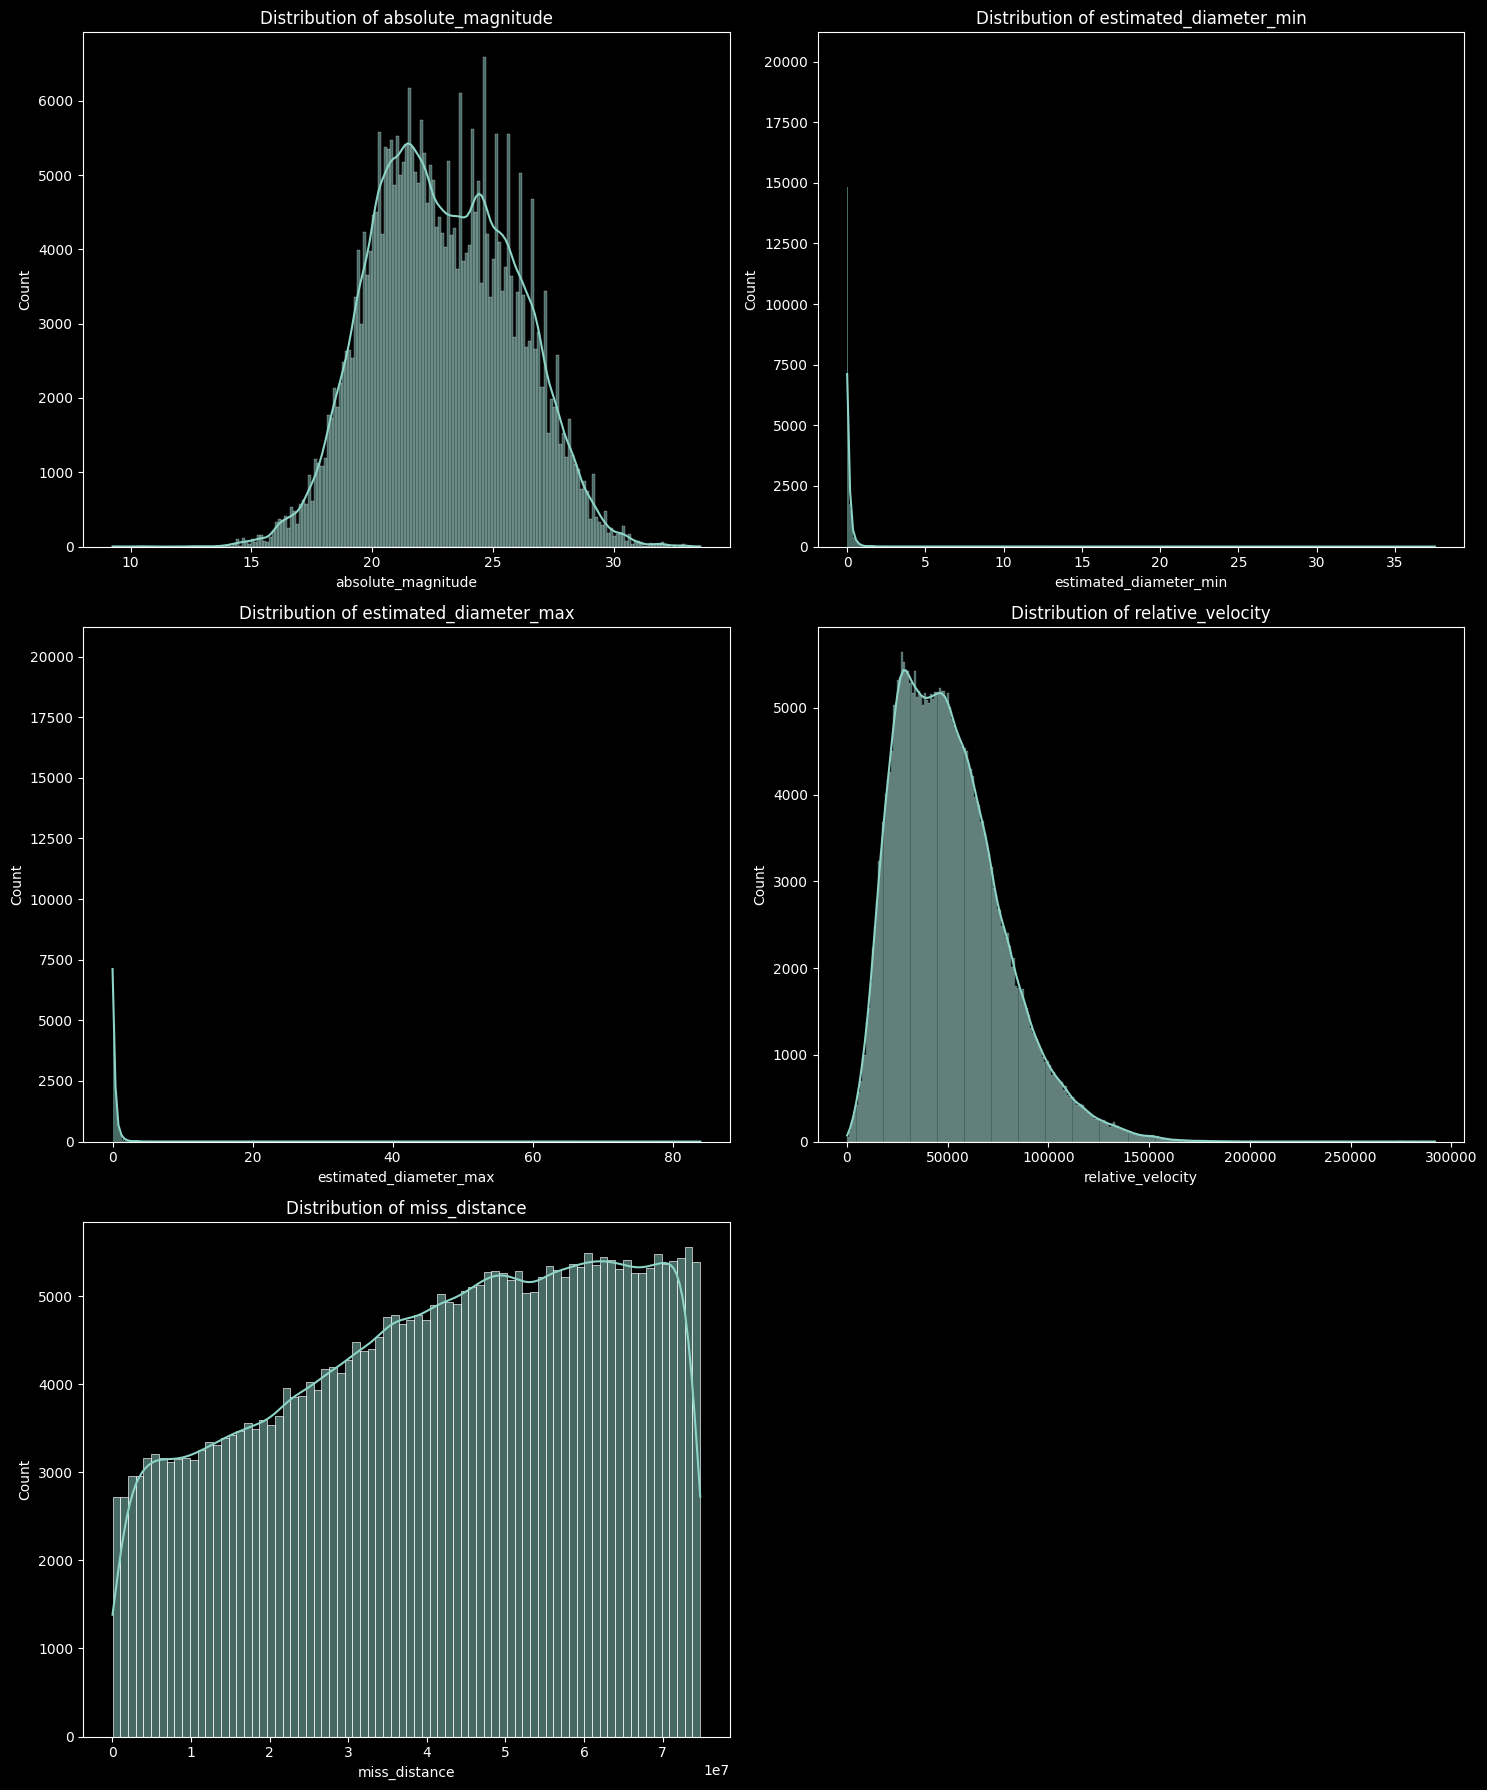

In [25]:
# Histograms
plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

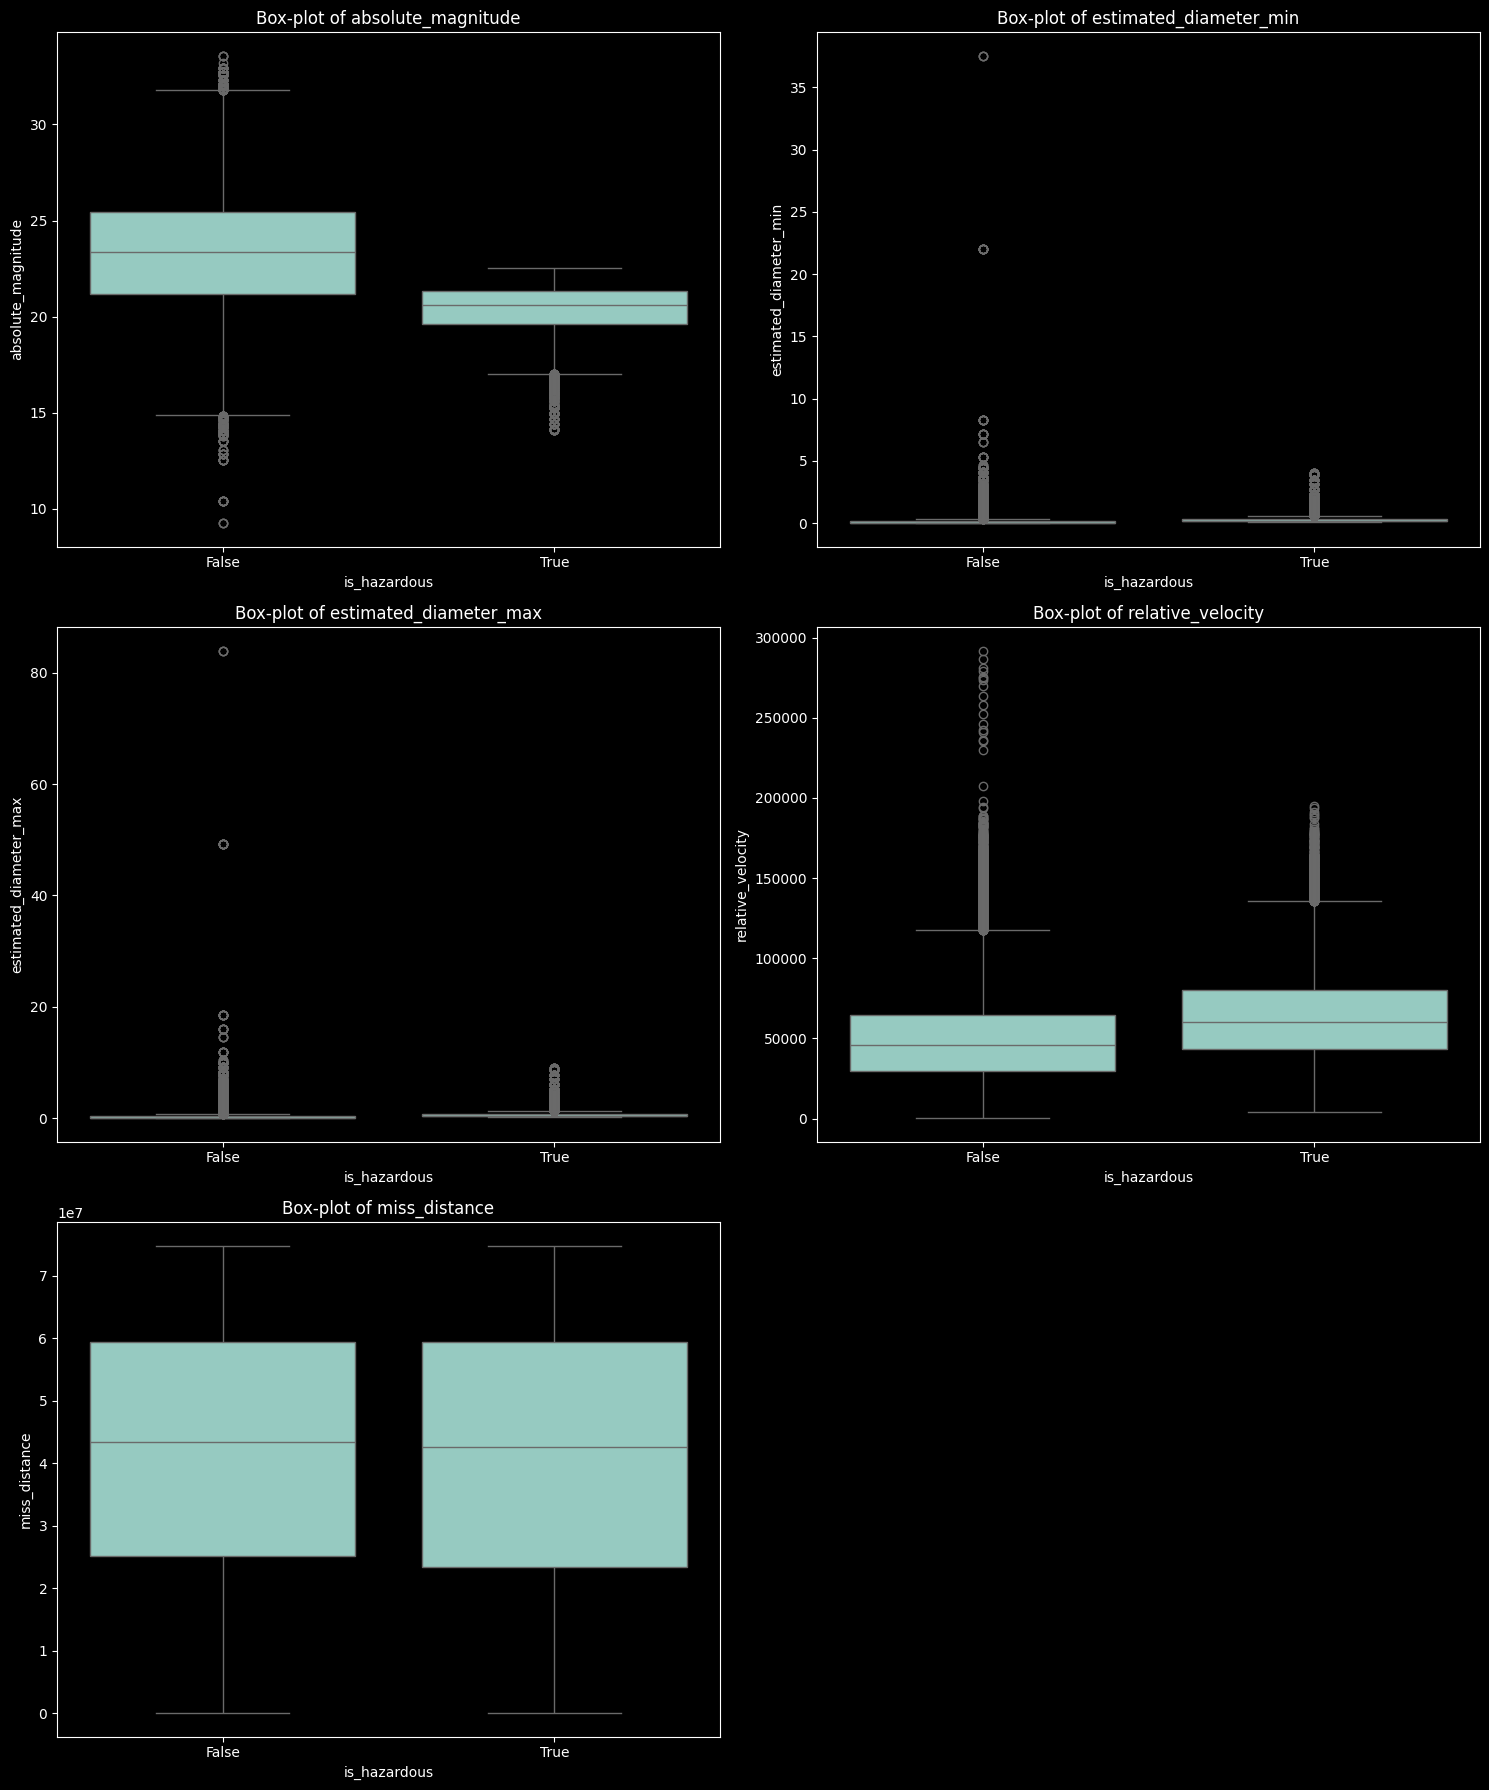

In [19]:
# Box plots
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=target_column,y=column,data=df)
    plt.title('Box-plot of {}'.format(column))
plt.tight_layout()
plt.show()

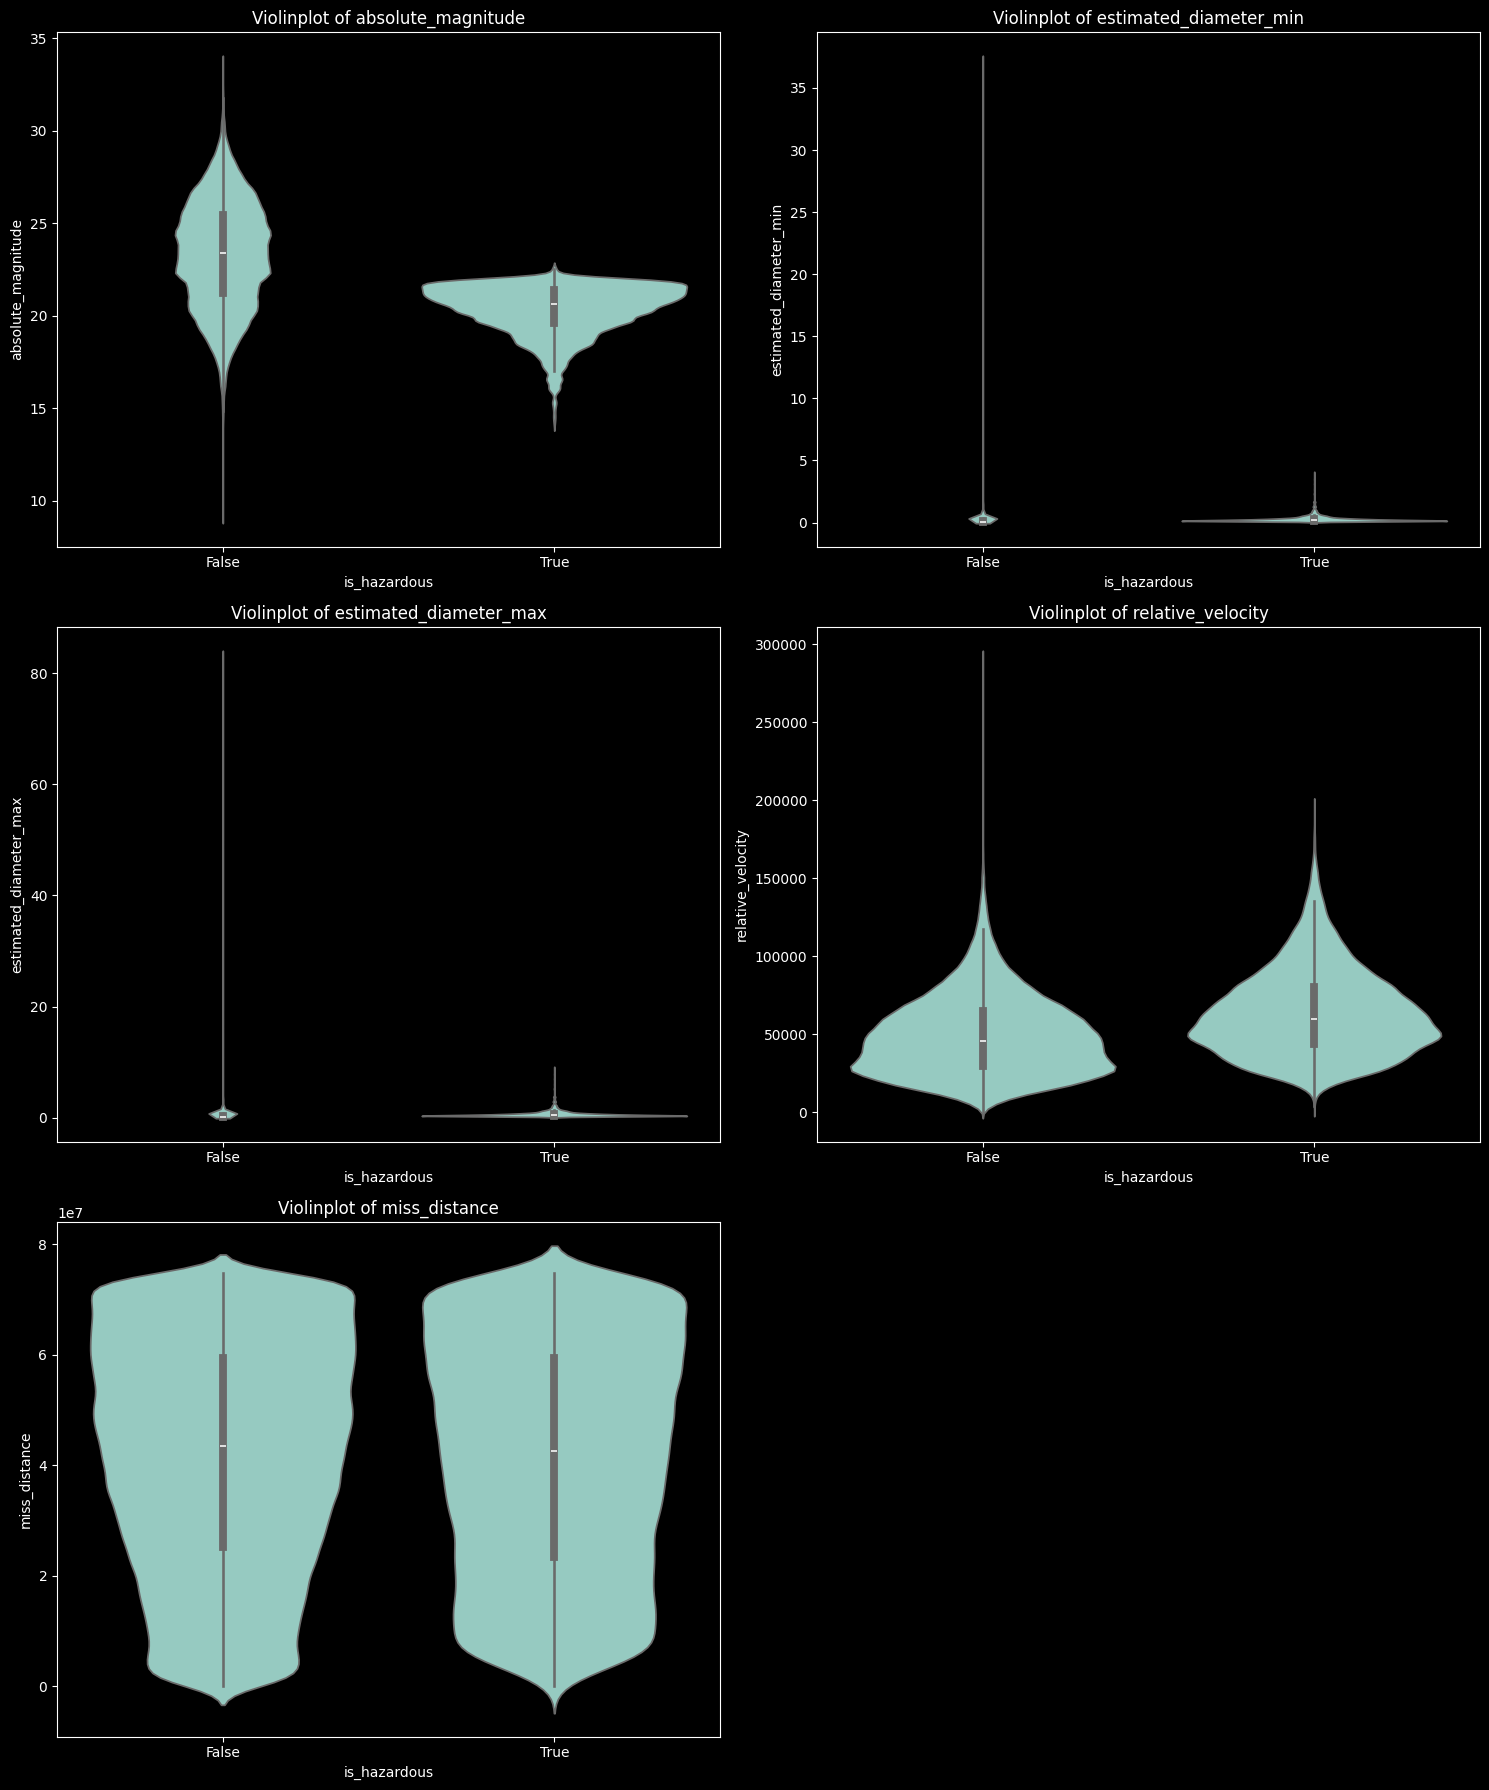

In [20]:
# Visualizing Data Density with Violin Plots
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.violinplot(x=target_column,y=column,data=df)
    plt.title('Violinplot of {}'.format(column))
plt.tight_layout()
plt.show()

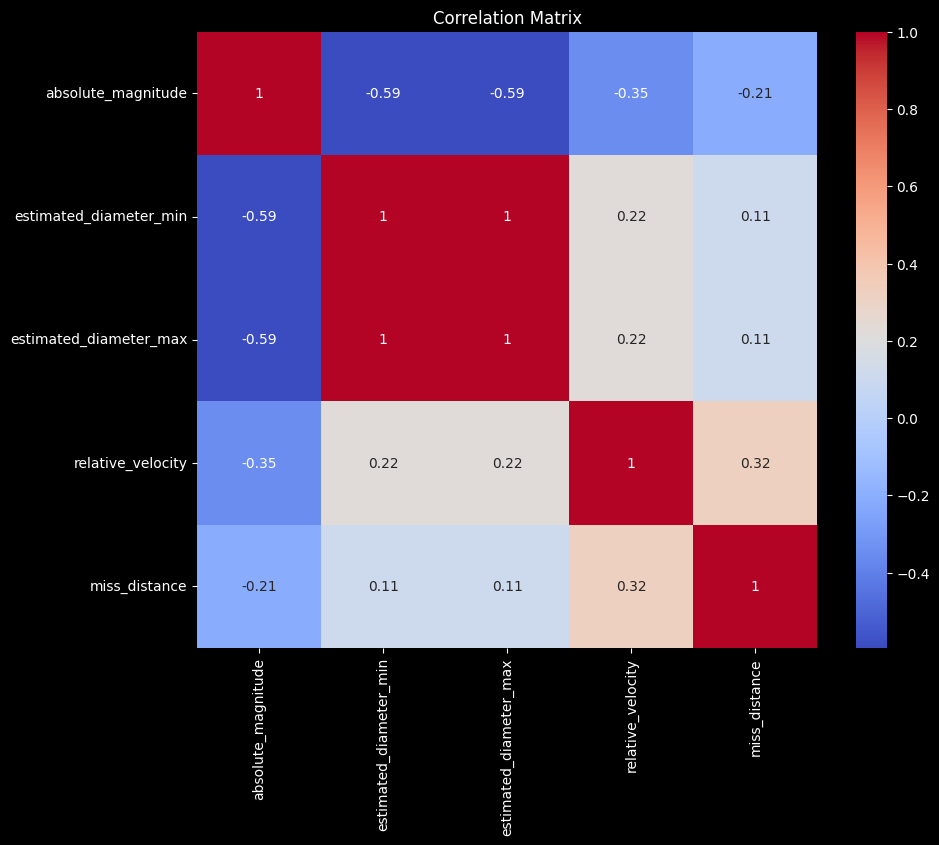

In [21]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Transforming Target Labels:转换目标标签 Encoding 'True' and 'False' as 1 and 0
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [27]:
# standardizing input features 标准化输入特征

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [28]:
# Splitting Data into Training and Testing Sets 将数据拆分为训练和测试集

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Building the Random Forest Model 建立随机森林模型

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, classification_report 

# 预测测试集的结果
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 输出分类报告
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59088
           1       0.71      0.59      0.65      8547

    accuracy                           0.92     67635
   macro avg       0.83      0.78      0.80     67635
weighted avg       0.91      0.92      0.91     67635



In [35]:
from sklearn.metrics import confusion_matrix  

# 计算并打印混淆矩阵
confusion_matrix(y_test, y_pred)

array([[57057,  2031],
       [ 3511,  5036]])

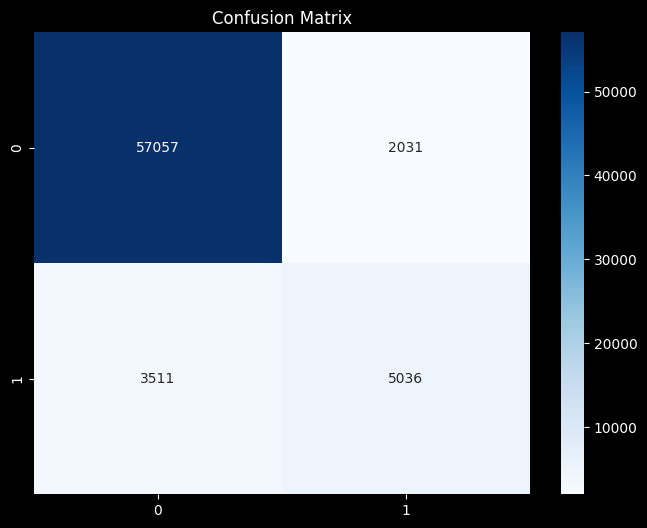

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Model Performance Analysis (Before Outlier Removal)
Before removing outliers, the Random Forest model achieved the following performance metrics:

Precision:
Class 0 (Non-Hazardous): 0.94
Class 1 (Hazardous): 0.71
Recall:
Class 0 (Non-Hazardous): 0.97
Class 1 (Hazardous): 0.59
F1-Score:
Class 0 (Non-Hazardous): 0.95
Class 1 (Hazardous): 0.65
Overall Accuracy: 0.92
Confusion Matrix
The confusion matrix is as follows:

Actual Class 0	Actual Class 1
57057	2031
3511	5036
Error Analysis
Type I Error (False Positive): This occurs when the model incorrectly classifies a non-hazardous object as hazardous. From the confusion matrix, the number of Type I errors is 2031.

Type II Error (False Negative): This occurs when the model incorrectly classifies a hazardous object as non-hazardous. From the confusion matrix, the number of Type II errors is 3511.

The model's performance before outlier removal indicates a strong ability to correctly identify non-hazardous objects but shows room for improvement in identifying hazardous objects. Addressing these Type II errors will be crucial for enhancing the model's reliability in predicting potentially dangerous near-Earth objects.

In [37]:
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [29]:
# Now Building Model: Outlier Removal and Predictions  现在建立模型： 异常值去除 和 预测

# Function to remove outliers using IQR      使用 IQR 去除离群值的函数

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the data
data = remove_outliers(df, feature_columns)

In [40]:
# Remove data
rows_removed = df.shape[0] - data.shape[0]
print(f'📉 We have removed approximately {rows_removed} rows from the dataset.')

📉 We have removed approximately 42403 rows from the dataset.


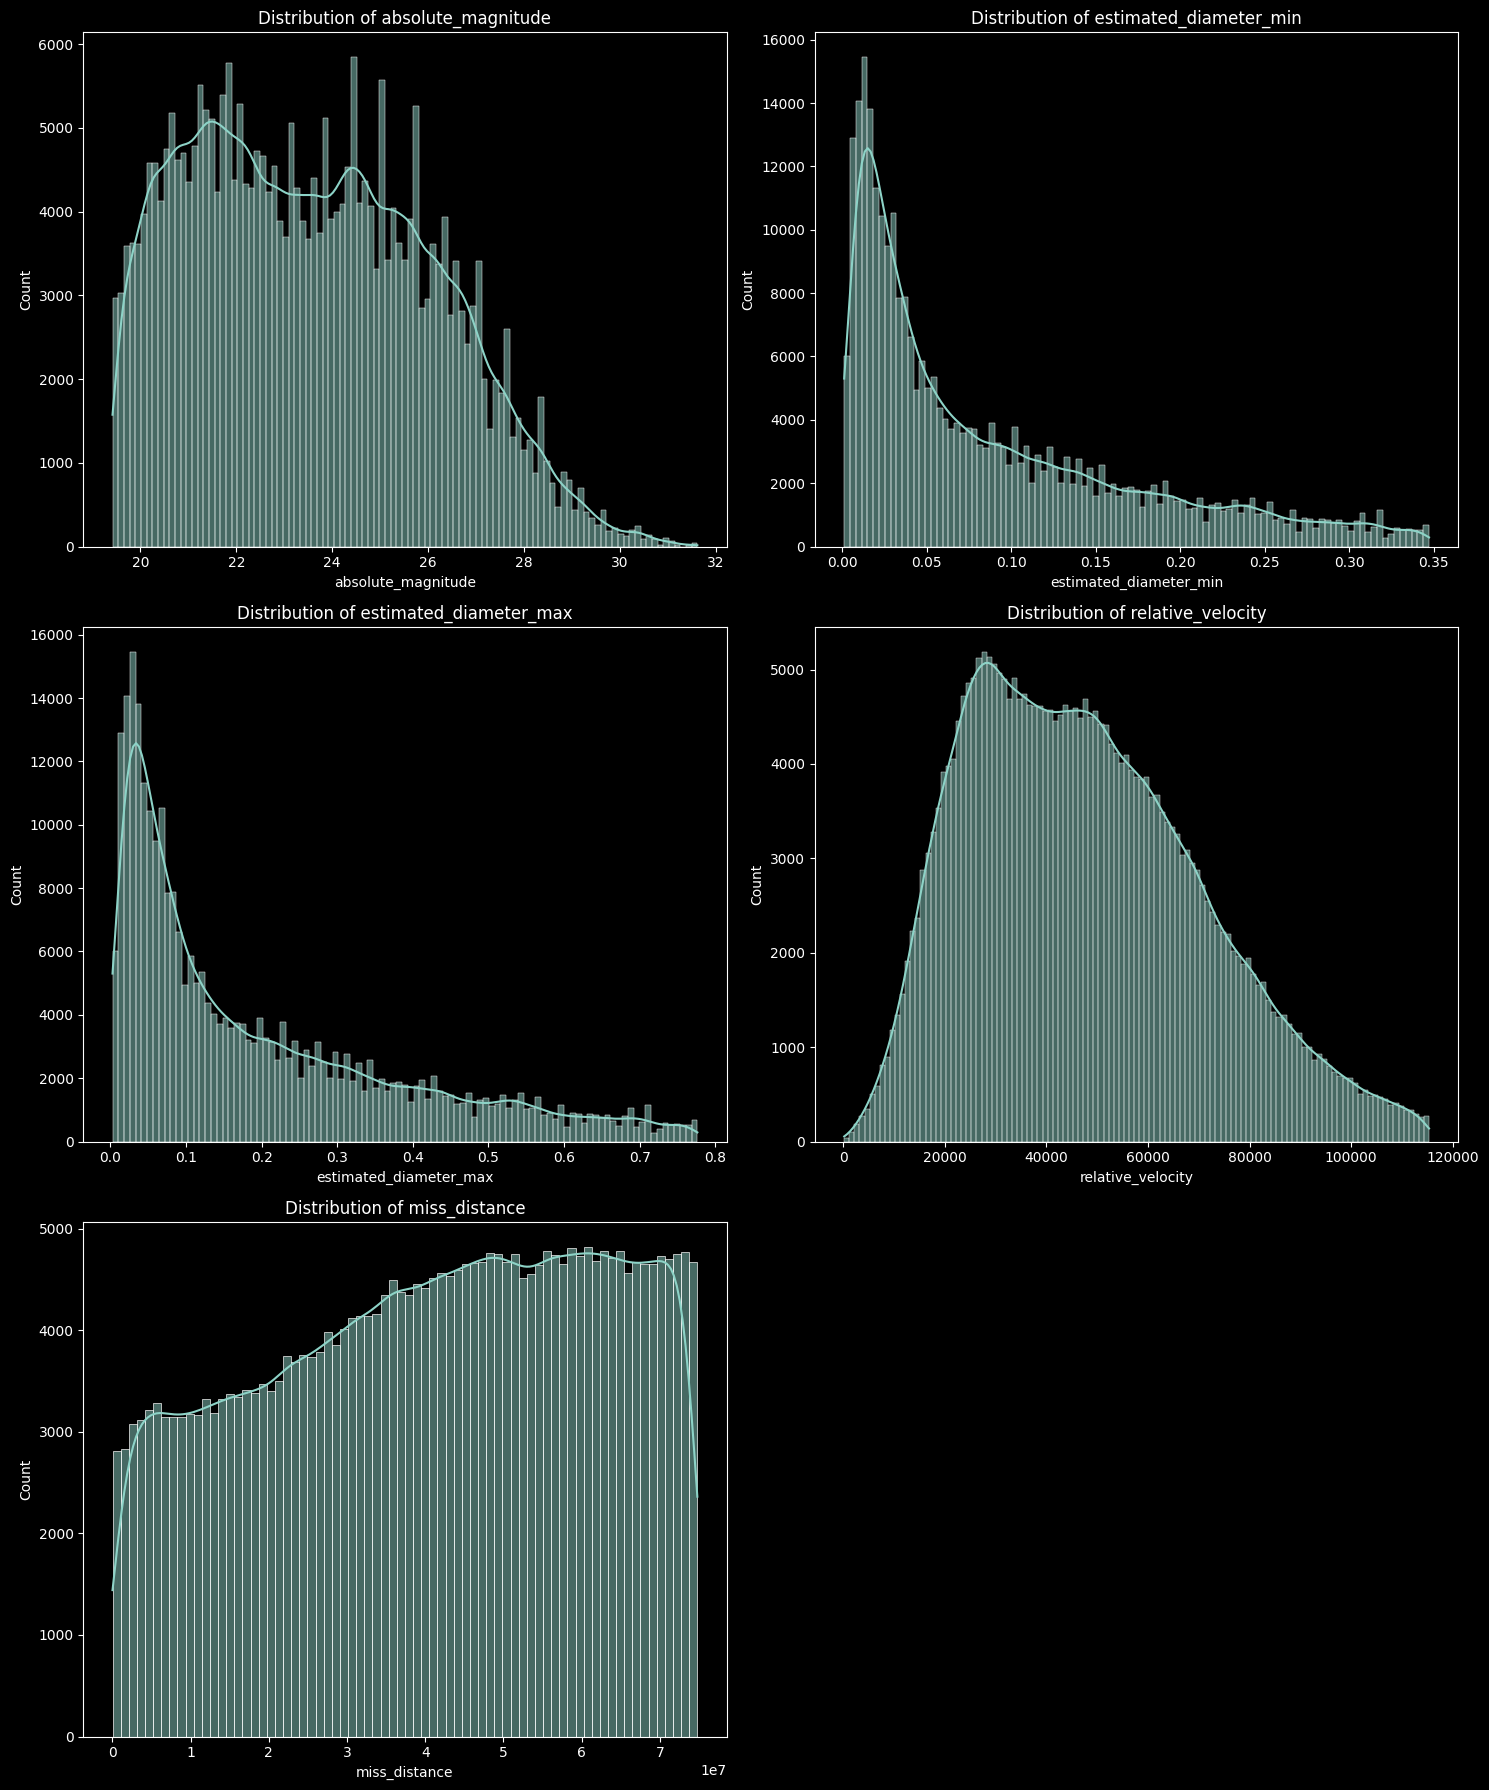

In [41]:
# Histogram Exploration Post-Outlier Removal: Analyzing Data Distribution

plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

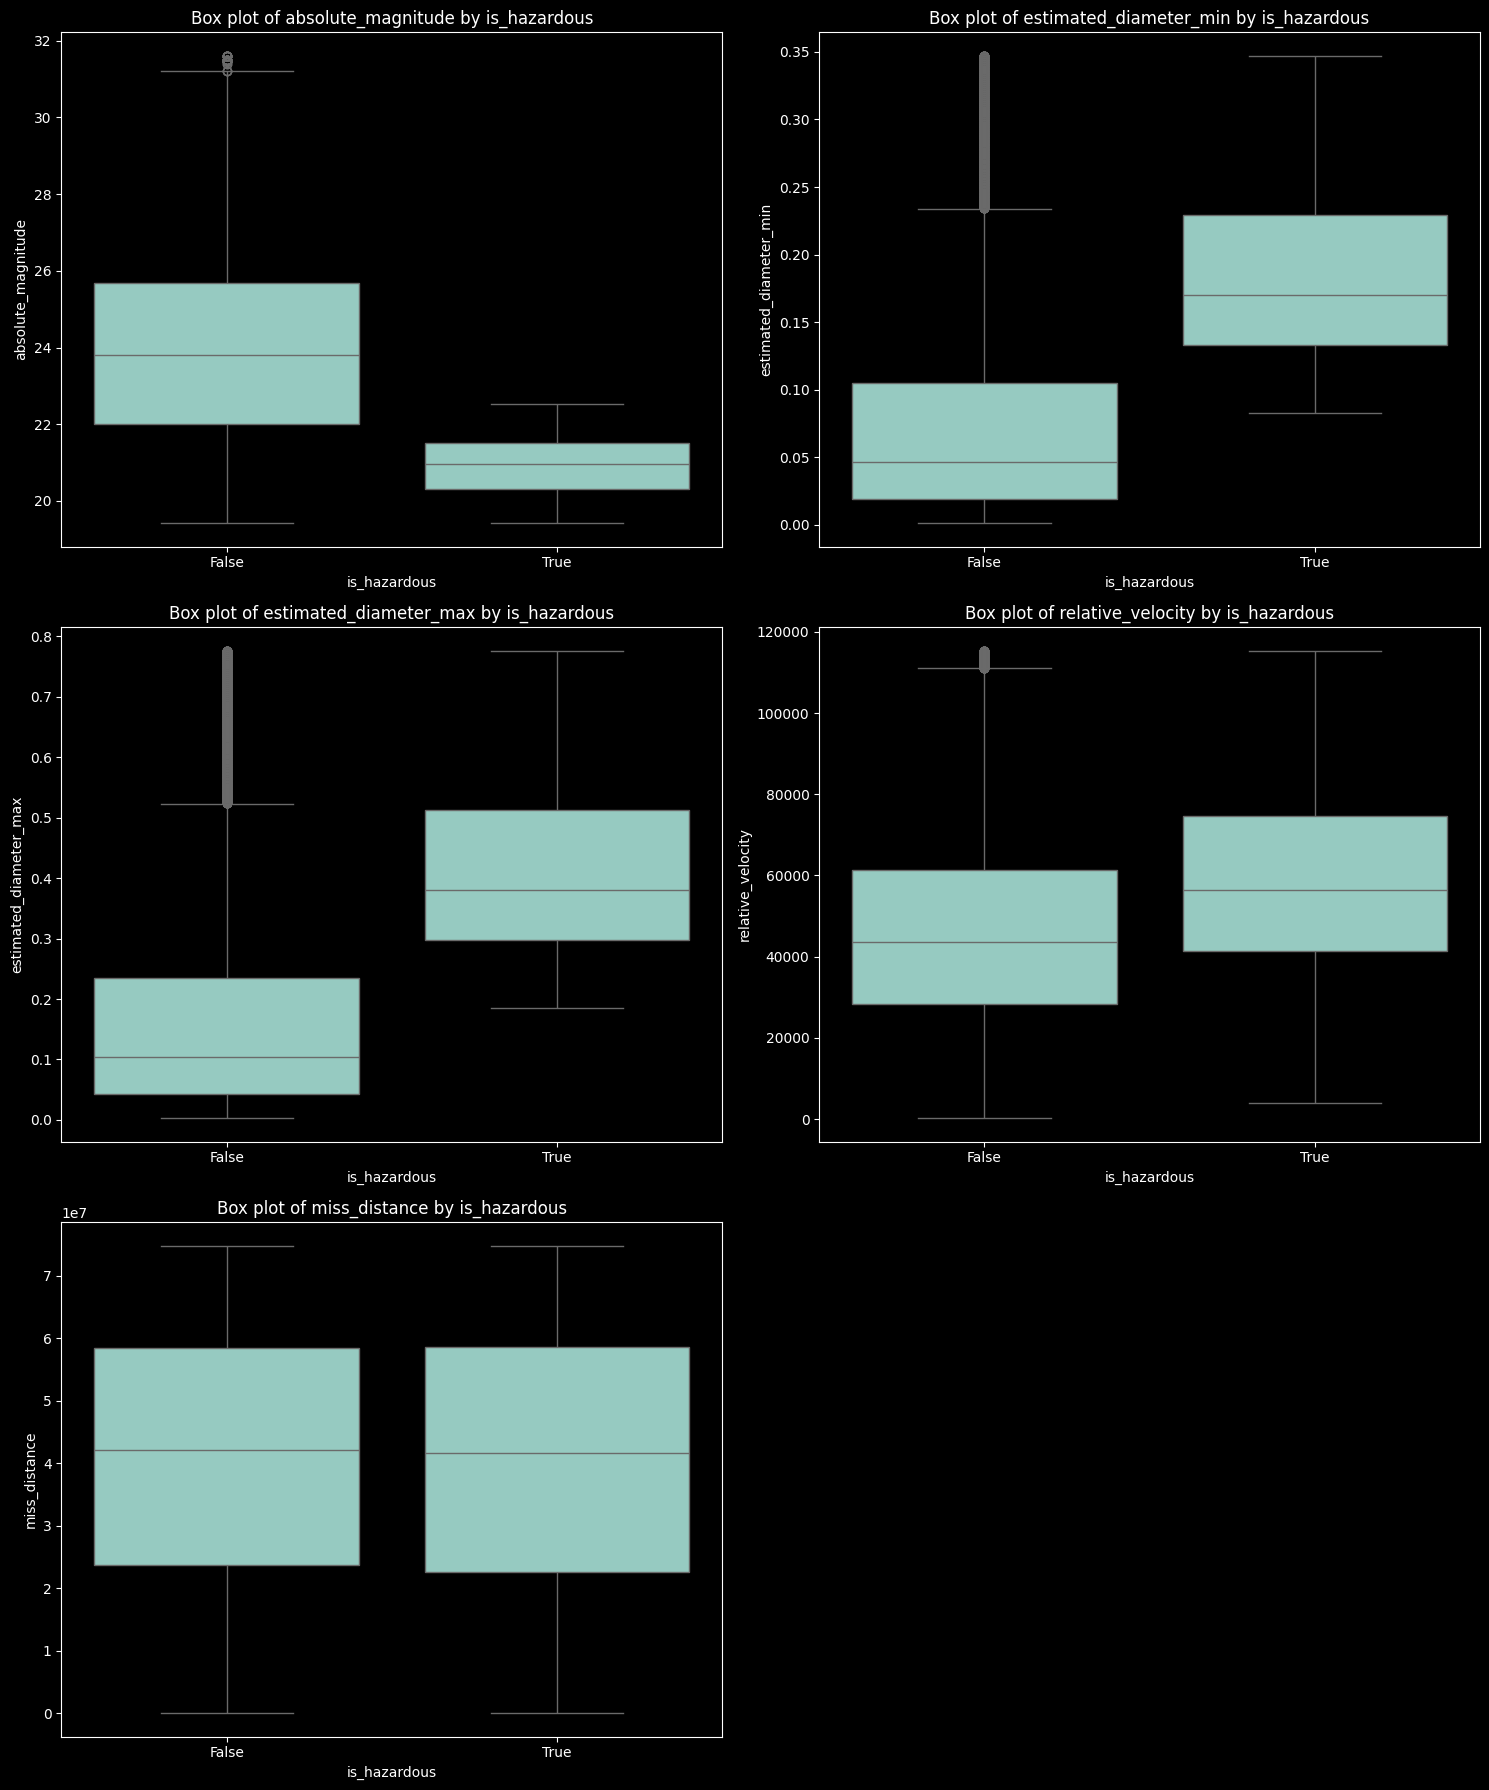

In [43]:
# Box Plot Exploration Post-Outlier Removal: Analyzing Data Range

plt.figure(figsize=(15, 18))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=target_column, y=col, data=data)
    plt.title(f'Box plot of {col} by {target_column}')
plt.tight_layout()
plt.show()

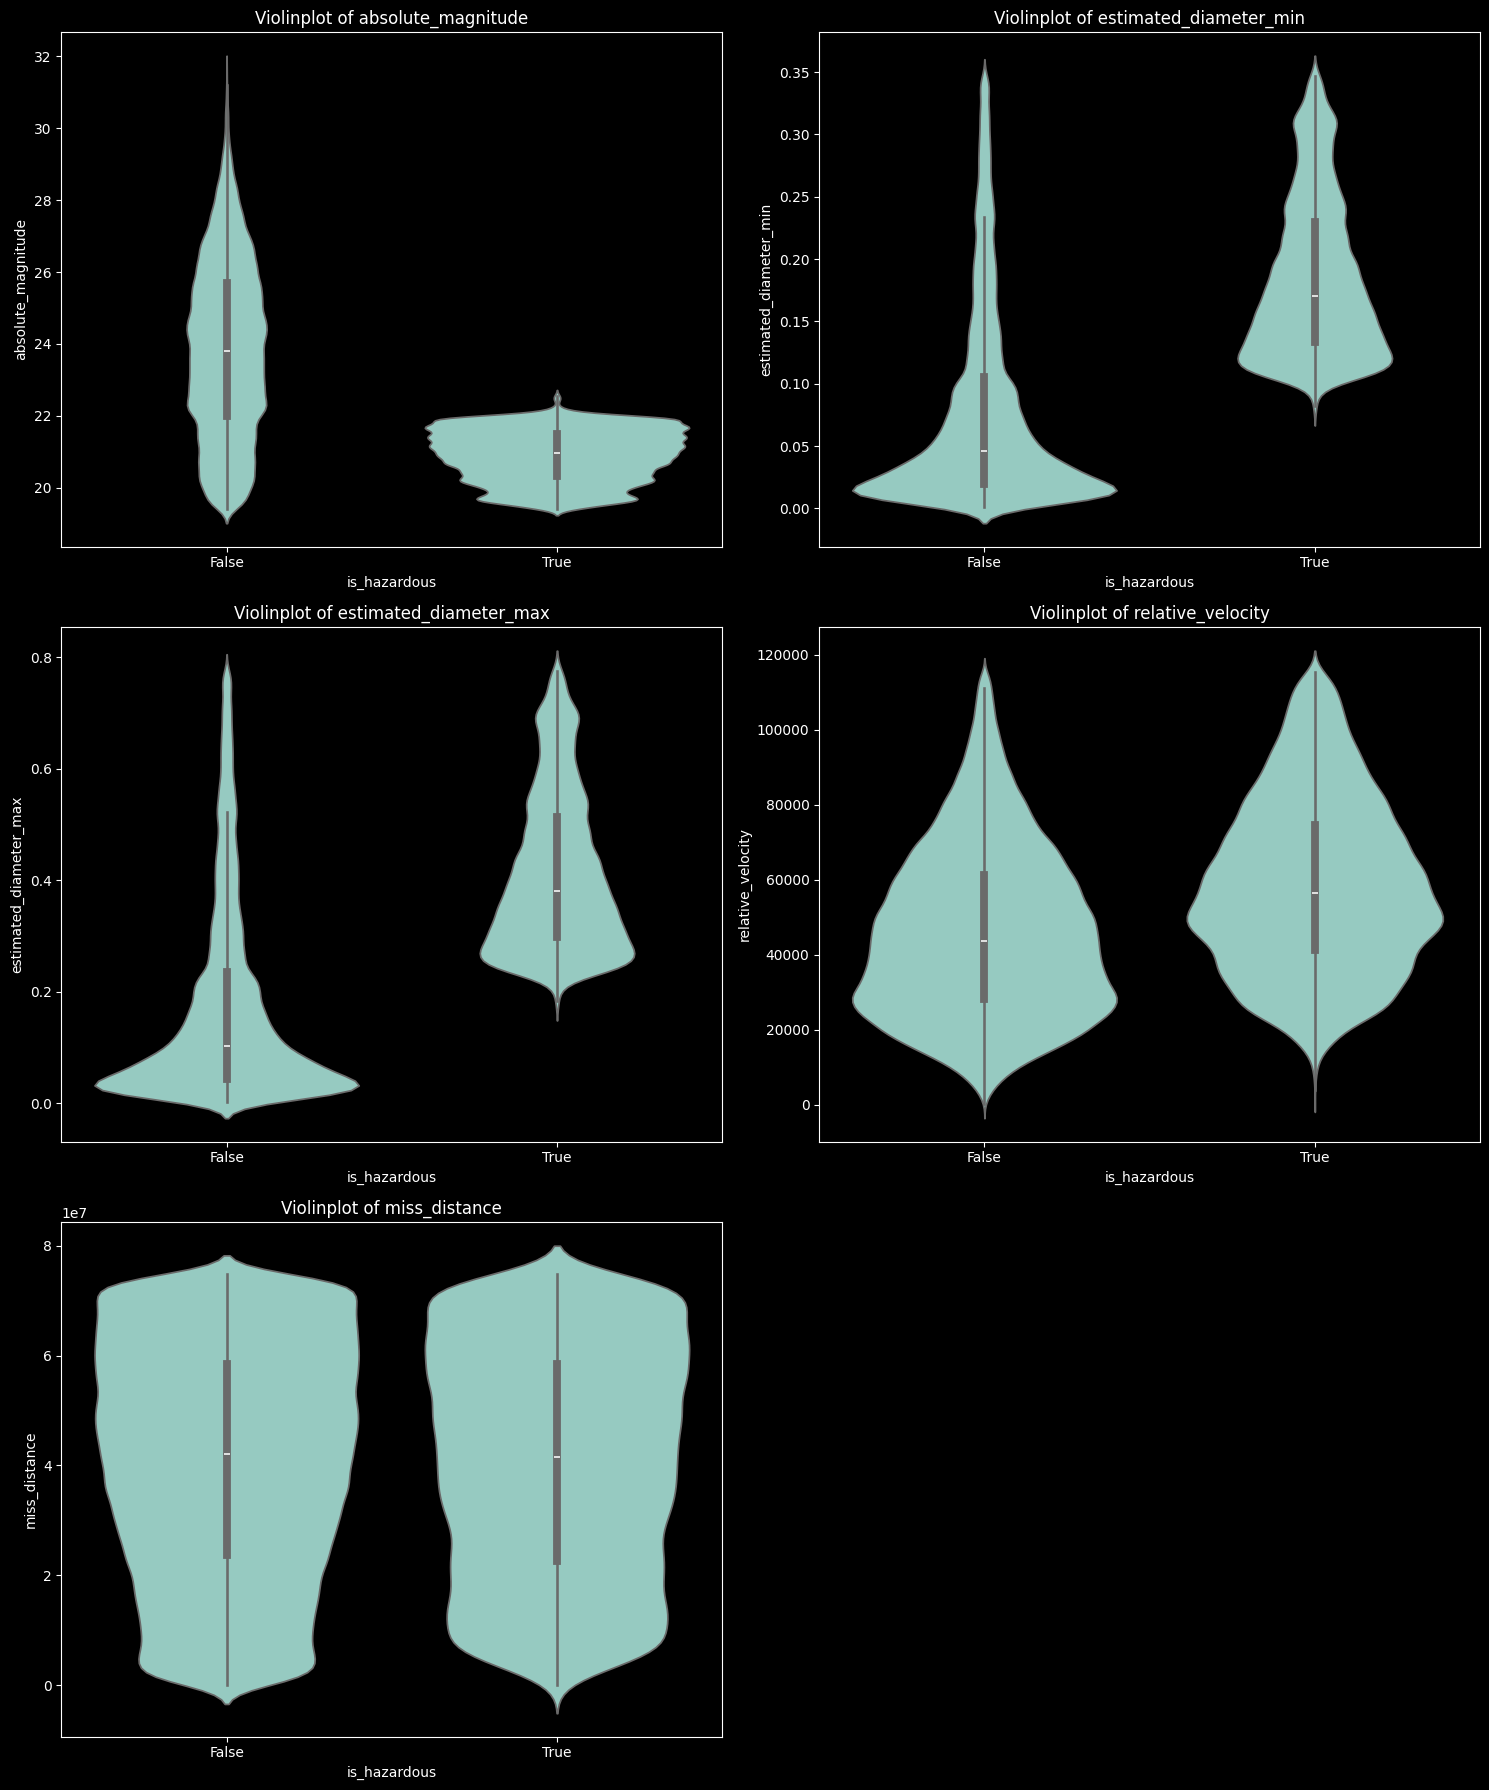

In [30]:
# Visualizing Data Density with Violin Plots Post-Outlier Removal
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.violinplot(x=target_column,y=column,data=data)
    plt.title('Violinplot of {}'.format(column))
plt.tight_layout()
plt.show()

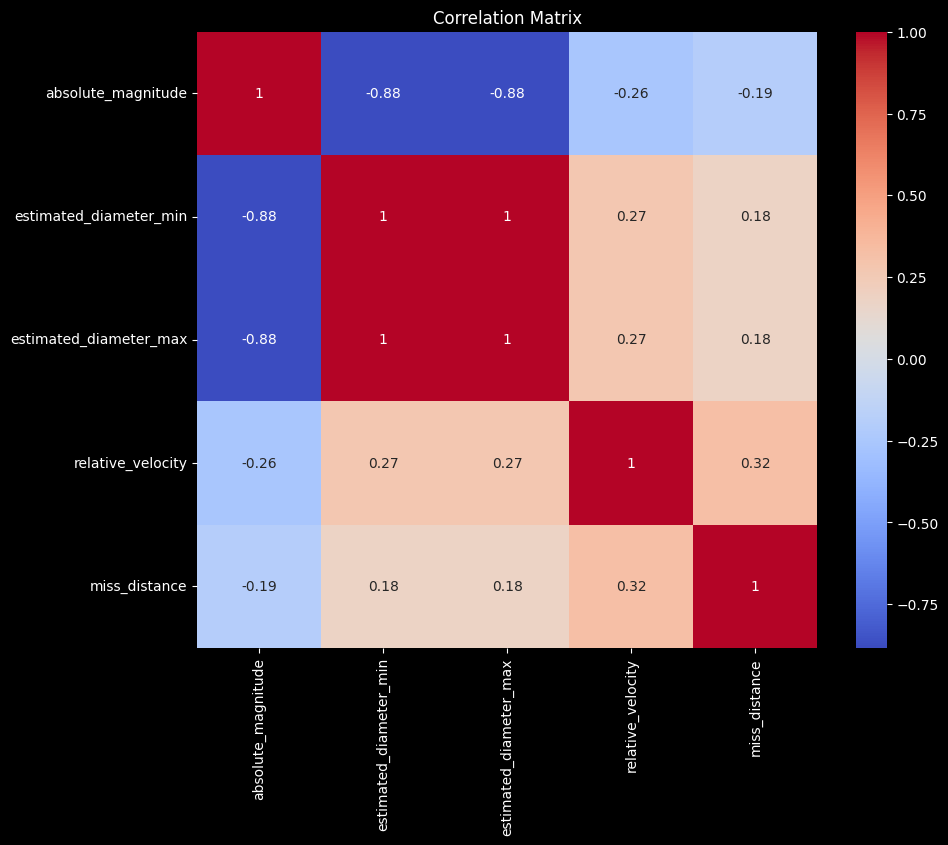

In [31]:
# Heat Map Insights: Analyzing Feature Correlations Post-Outlier Removal
plt.figure(figsize=(10, 8))
correlation_matrix = data[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Building Random Forest Model: Encoding Target Column, Scaling Features, and Predicting Outcomes

from sklearn.metrics import classification_report, accuracy_score  # 导入缺失的库

X=data.drop('is_hazardous',axis=1)
y=data['is_hazardous']
 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X=scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     52844
           1       0.70      0.58      0.64      6310

    accuracy                           0.93     59154
   macro avg       0.83      0.78      0.80     59154
weighted avg       0.93      0.93      0.93     59154

Accuracy: 0.93


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # 导入 confusion_matrix

confusion_matrix(y_test, y_pred)

array([[51299,  1545],
       [ 2620,  3690]])

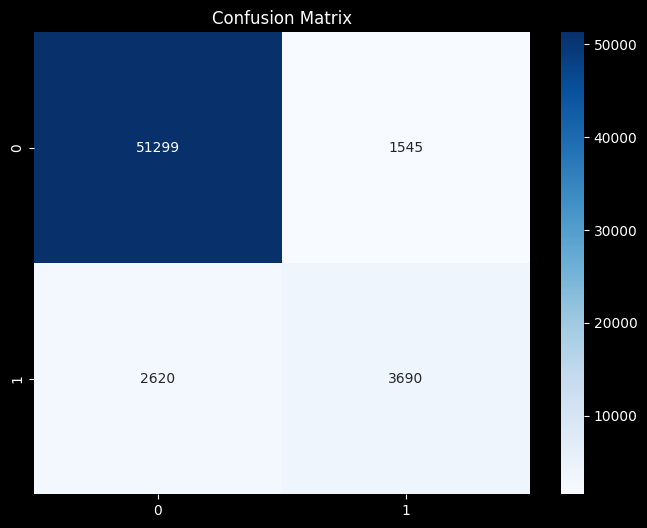

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Model Performance Analysis
After removing outliers, the Random Forest model has achieved the following performance metrics:

Precision:
Class 0 (Non-Hazardous): 0.95
Class 1 (Hazardous): 0.70
Recall:
Class 0 (Non-Hazardous): 0.97
Class 1 (Hazardous): 0.58
F1-Score:
Class 0 (Non-Hazardous): 0.96
Class 1 (Hazardous): 0.64
Overall Accuracy: 0.93
Confusion Matrix
The confusion matrix is as follows:

Actual Class 0	Actual Class 1
51299	1545
2620	3690
Error Analysis
Type I Error (False Positive): This occurs when the model incorrectly classifies a non-hazardous object as hazardous. From the confusion matrix, the number of Type I errors is 1545.

Type II Error (False Negative): This occurs when the model incorrectly classifies a hazardous object as non-hazardous. From the confusion matrix, the number of Type II errors is 2620.

The model's performance has improved overall after outlier removal, achieving an accuracy of 0.93. However, the recall for hazardous objects remains a concern, indicating that some hazardous objects are still being missed. Addressing these Type II errors is crucial for enhancing the model's reliability in predicting potentially dangerous near-Earth objects.

In [ ]:
Building XGBoost, Gradient Boosting, and Voting Classifier: Predicting Outcomes

In [ ]:
# Initialize models
xgb_model = XGBClassifier(use_label_encoder=False)
gb_model = GradientBoostingClassifier()
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='soft')

# Train models
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
voting_predictions = voting_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print()

print("XGBoost Classifier:")
evaluate_model(y_test, xgb_predictions, "XGBoost Classifier")

print("Gradient Boosting Classifier:")
evaluate_model(y_test, gb_predictions, "Gradient Boosting Classifier")

print("Voting Classifier:")
evaluate_model(y_test, voting_predictions, "Voting Classifier")

Model Evaluation Comparison
Model	Accuracy	Precision	Recall	F1-Score
XGBoost Classifier	0.9114	0.8977	0.9114	0.8953
Gradient Boosting Classifier	0.9047	0.8892	0.9047	0.8777
Voting Classifier	0.9080	0.8939	0.9080	0.8854
Random Forest Classifier	0.9300	0.9500	0.9700	0.9600
Evaluation Metrics Explanation
Accuracy: The ratio of correctly predicted instances to the total instances. It measures how often the model is correct overall.

Precision: The ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positive cases are actually positive.

Recall: The ratio of true positive predictions to the total actual positives. It measures how many of the actual positive cases are captured by the model.

F1-Score: The harmonic mean of precision and recall. It provides a single metric that balances the two aspects of the model’s performance.

Best Model Analysis
After evaluating various models, the Random Forest Classifier has emerged as the best performing model based on the following metrics:

Accuracy: 0.93
Precision:
Class 0 (Non-Hazardous): 0.95
Class 1 (Hazardous): 0.70
Recall:
Class 0 (Non-Hazardous): 0.97
Class 1 (Hazardous): 0.58
F1-Score:
Class 0 (Non-Hazardous): 0.96
Class 1 (Hazardous): 0.64
Overall Accuracy: 0.93
Confusion Matrix
Predicted Class 0	Predicted Class 1
Actual Class 0	51,299	1,545
Actual Class 1	2,620	3,690
The Random Forest Classifier achieved the highest accuracy of 0.93, demonstrating its strong performance in predicting whether an NEO is hazardous or not. Although the precision for class 1 (hazardous) is lower compared to class 0, the overall model effectiveness is notable. This model balances accuracy and precision well, making it a reliable choice for identifying potentially hazardous near-Earth objects.

Model Performance Analysis: Before and After Outlier Removal of Random Forest Classifier
Before Outlier Removal	After Outlier Removal
Precision:

Class 0 (Non-Hazardous): 0.94
Class 1 (Hazardous): 0.71
Recall:

Class 0 (Non-Hazardous): 0.97
Class 1 (Hazardous): 0.59
F1-Score:

Class 0 (Non-Hazardous): 0.95
Class 1 (Hazardous): 0.65
Overall Accuracy: 0.92

Confusion Matrix
Actual Class 0	Actual Class 1
57057	2031
3511	5036
Error Analysis
Type I Error (False Positive): 2031

Type II Error (False Negative): 3511

Precision:

Class 0 (Non-Hazardous): 0.95
Class 1 (Hazardous): 0.70
Recall:

Class 0 (Non-Hazardous): 0.97
Class 1 (Hazardous): 0.58
F1-Score:

Class 0 (Non-Hazardous): 0.96
Class 1 (Hazardous): 0.64
Overall Accuracy: 0.93

Confusion Matrix
Actual Class 0	Actual Class 1
51299	1545
2620	3690
Error Analysis
Type I Error (False Positive): 1545

Type II Error (False Negative): 2620

“Outlier removal”（异常值去除） 是数据预处理中非常重要的一步。异常值（Outliers）指的是   与数据集中的 大多数数据点  显著不同的值， 通常它们 远离 数据的主要分布。这些异常值 可能会对数据分析、机器学习模型的训练 和 预测产生负面影响，因此在数据处理中 通常需要 进行异常值的 检测 和 去除。

异常值去除的步骤：
检测异常值：

使用统计方法（如标准差、四分位距（IQR））来检测数据中的异常值。
使用可视化方法（如箱线图（Box Plot）、散点图（Scatter Plot））来识别数据中的离群点。
处理异常值：

删除异常值：如果异常值是由于  测量错误  或  录入错误  等原因引起的，通常会  直接删除  这些数据点。
替换异常值：如果异常值是 由于 少量 异常事件引起的（如极端天气），可以选择用  平均值、中位数或  其他合适的值  来 替换 异常值。
使用算法处理异常值：一些机器学习算法（如树模型）对异常值不敏感，可以直接使用这些算法进行建模，而无需去除异常值。

何时进行异常值去除？
数据质量：异常值往往会导致统计  分析结果 的 偏差，影响数据的质量。因此，去除 异常值  有助于提高数据的 准确性和一致性。
模型性能：异常值可能会对某些机器学习模型（如线性回归、支持向量机等）造成负面影响，因为这些模型对数据分布的假设比较严格。去除异常值有助于 提高 模型的训练效果和预测性能。


注意事项
去除异常值 时要谨慎，特别是在无法确认异常值是否有意义的情况下。
在某些场景中，异常值可能是重要信息的一部分。例如，银行欺诈检测中，异常值 可能代表  欺诈行为。
通过合理的 异常值检测 和 去除，可以显著 提高数据分析 和 模型训练 的效果。







